In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def sigma(x):
    return np.reciprocal(1 + np.exp(-x))

In [3]:
def prepare(v):
    return np.hstack((1, v, v**2))


Xs = [prepare(np.random.randn(2)) for _ in range(100)] + [prepare(np.random.randn(2) + 1.5) for _ in range(100)]
Ys = [-1 for _ in range(100)] + [1 for _ in range(100)]

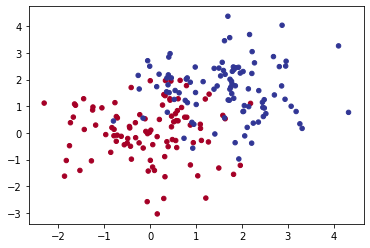

In [4]:
plt.scatter([x[1] for x in Xs], [x[2] for x in Xs], s=20, c=Ys, cmap="RdYlBu");

In [9]:
def log_likelihood_grad(w):
    grad = np.zeros_like(w)

    for y, xs in zip(Ys, Xs):
        grad += y * (1 - sigma(y * w @ xs)) * xs

    grad -= 5e-1 * w

    return grad

In [10]:
w = np.zeros(5)

for i in range(10000):
    w += 1e-2 * log_likelihood_grad(w)

w

array([-2.65066039,  1.2499997 ,  1.17418466,  0.29297732,  0.18868008])

In [11]:
predictions = []
for sample in Xs:
    predictions.append(sigma(w @ sample))

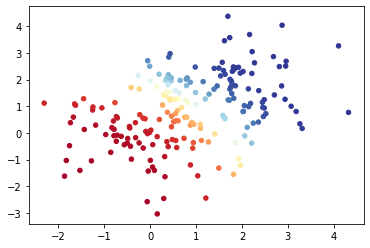

In [12]:
plt.scatter([x[1] for x in Xs], [x[2] for x in Xs], s=20, c=predictions, cmap="RdYlBu");